# 이번주 과제였던 것)  start end , resample, standardization, make dataframe,  analyze(arousal, valence와도 비교해서, 사람 각각에 비교)- 특징 2개 이상 찾아오기 
(도현이 형이랑 user_ID 나눠서; 각 4개씩 (유진, 호영만 나누면 됨)

In [ ]:
import pandas as pd

In [ ]:
import datetime
a = datetime.timedelta(minutes=1.0, seconds=6) - datetime.timedelta(minutes=1, seconds=2)
a.total_seconds()

4.0

In [ ]:
a = pd.read_csv('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/_성민/preprossed_start-end/UserID_3/Frozen.TXT', sep='\t', error_bad_lines=False)

# time_diff = a[a.columns[1][0]] - a[a.columns[1][-1]]
# a[a.columns[1]]
# time_diff

# a[[a.columns[1]]].info()
tp = a[a.columns[1]]
print(tp[0])
print()
b = tp[0].split(':')
x,y = b[2].split('.')
b.pop(2)
b.extend([x,y])
b
k = [*map(float, b)]
k
print(type(y))

16:23:04.29

<class 'str'>


b'Skipping line 5255: expected 2 fields, saw 3\n'


In [ ]:
a = pd.read_csv('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/_성민/preprossed_start-end/UserID_3/Frozen.TXT', sep='\t', error_bad_lines=False)


a

b'Skipping line 5255: expected 2 fields, saw 3\n'


,437.592987,16:23:04.14
0,463.345703,16:23:04.29
1,441.651947,16:23:04.34
2,459.090912,16:23:04.29
3,435.306915,16:23:04.45
4,422.790680,16:23:04.50
...,...,...
5250,399.321075,16:23:56.518
5251,410.299530,16:23:56.533
5252,419.949615,16:23:56.538
5253,442.237946,16:23:56.565


In [ ]:
def original_freq(series):
  
  max_time_list = series.iloc[-1].split(':')
  second, milliseconds = max_time_list[2].split('.')
  max_time_list.pop(2)
  max_time_list.extend([second, int(milliseconds)*10])
  max_time_list = [*map(float, max_time_list)]

  min_time_list = series[0].split(':')
  second, milliseconds = min_time_list[2].split('.')
  min_time_list.pop(2)
  min_time_list.extend([second, int(milliseconds)*10])
  min_time_list = [*map(float, min_time_list)]


  max_time = datetime.timedelta(hours=max_time_list[0], minutes=max_time_list[1], seconds=max_time_list[2], milliseconds=max_time_list[3])
  min_time = datetime.timedelta(hours=min_time_list[0], minutes=min_time_list[1], seconds=min_time_list[2], milliseconds=min_time_list[3])
  video_length = (max_time - min_time).total_seconds()
  return len(series) / video_length

def sample(data, original_freq, target_freq):
    resample = librosa.resample(data, original_freq, target_freq)
    return resample

original_freq = original_freq(a[a.columns[1]]) 


a = a.drop(a.columns[1], axis=1)
a = np.array(a).reshape(a.shape[0],)

a = sample(a, original_freq, 128)

a = pd.DataFrame(a)
a

,0
0,449.108239
1,492.414860
2,420.152134
3,456.421001
4,458.109062
...,...
7344,418.366240
7345,402.161158
7346,485.966317
7347,449.019867


In [ ]:
def original_freq(series):
  
  max_time_list = series.iloc[-1].split(':')
  second = int(float(max_time_list[2]))
  milliseconds = float(max_time_list[2]) - second
  max_time_list.pop(2)
  max_time_list.extend([second, int(milliseconds)*1000])
  max_time_list = [*map(float, max_time_list)]

  min_time_list = series[0].split(':')
  second = int(float(max_time_list[2]))
  milliseconds = float(max_time_list[2]) - second
  min_time_list.pop(2)
  min_time_list.extend([second, int(milliseconds)*1000])
  min_time_list = [*map(float, min_time_list)]


  max_time = datetime.timedelta(hours=max_time_list[0], minutes=max_time_list[1], seconds=max_time_list[2], milliseconds=max_time_list[3])
  min_time = datetime.timedelta(hours=min_time_list[0], minutes=min_time_list[1], seconds=min_time_list[2], milliseconds=min_time_list[3])
  video_length = (max_time - min_time).total_seconds()
  return len(series) / video_length

In [ ]:
4.234 % 1

0.23399999999999999

In [ ]:
os.listdir('./UserID_3')

['Frozen.TXT',
 'Up.TXT',
 'Aladdin.TXT',
 'Bighero.TXT',
 'Coco.TXT',
 'Earth.TXT',
 'Elbin Superband.TXT',
 'Good Dino.TXT',
 'Harrypotter.TXT',
 'Insideout.TXT',
 'Lionking.TXT',
 'Little Prince.TXT',
 'Minians.TXT',
 'Moana.TXT',
 'Pono.TXT']

In [ ]:
from google.colab import drive
import pandas as pd
import os
import datetime
import numpy as np

drive.mount('/content/gdrive/')
os.chdir('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/_성민/preprossed_start-end/')

dir = os.listdir('./')

user_name = []
for i in range(len(dir)):
  user_name.append('UserID_' + input("UserID:"))

names = []
for name in user_name:
  globals()[name] = []
  names.append(globals()[name])

i = 0
for files in dir:
  file_list = os.listdir('./{}'.format(files))
  for file in file_list:
    tmp = pd.read_csv('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/_성민/preprossed_start-end/{}/{}'.format(files, file), sep='\t', error_bad_lines=False)
    names[i].append(tmp)
  
  i += 1



i = 0
j = 0
time_series = []

for user in names:
  j = 0
  tmp = []
  for video in user:
    tmp.append(video[video.columns[1]])
    video = video.drop(video.columns[1], axis=1)
    video = np.array(video).reshape(video.shape[0],)
    names[i][j] = video
    j += 1
  time_series.append(tmp)

  i += 1

#original_freq(time_series[0][0])
time_series[0][0]

def original_freq(series):
  
  max_time_list = series.iloc[-1].split(':')
  second = int(float(max_time_list[2]))
  milliseconds = float(max_time_list[2]) - second
  max_time_list.pop(2)
  max_time_list.extend([second, milliseconds*1000])
  max_time_list = [*map(float, max_time_list)]

  min_time_list = series[0].split(':')
  second = int(float(max_time_list[2]))
  milliseconds = float(max_time_list[2]) - second
  min_time_list.pop(2)
  min_time_list.extend([second, milliseconds*1000])
  min_time_list = [*map(float, min_time_list)]


  max_time = datetime.timedelta(hours=max_time_list[0], minutes=max_time_list[1], seconds=max_time_list[2], milliseconds=max_time_list[3])
  min_time = datetime.timedelta(hours=min_time_list[0], minutes=min_time_list[1], seconds=min_time_list[2], milliseconds=min_time_list[3])
  video_length = (max_time - min_time)3.total_seconds()
  return len(series) / video_length

original_freq(time_series[0][0])

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
UserID:3
UserID:7
UserID:8


b'Skipping line 5255: expected 2 fields, saw 3\n'


9219.298245614036

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
UserID:3
UserID:7
UserID:8


b'Skipping line 5255: expected 2 fields, saw 3\n'


      455.742920  16:24:37.12
0     437.784576  16:24:37.27
1     466.806702  16:24:37.32
2     485.860077  16:24:37.43
3     512.243896  16:24:37.48
4     492.561584  16:24:37.59
...          ...          ...
8499  434.739136  16:26:02.26
8500  411.820404  16:26:02.21
8501  418.368195  16:26:02.36
8502  410.805267  16:26:02.41
8503  416.278107  16:26:02.52

[8504 rows x 2 columns]



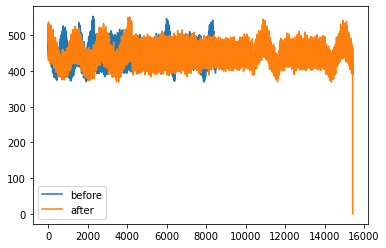

In [ ]:
######### TEST ##########

###############################################################################################################
# load start-end file


from google.colab import drive
import pandas as pd
import os
import datetime

drive.mount('/content/gdrive/')
os.chdir('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/_성민/preprossed_start-end/')

dir = os.listdir('./')

user_name = []
for i in range(len(dir)):
  user_name.append('UserID_' + input("UserID:"))

names = []
for name in user_name:
  globals()[name] = []
  names.append(globals()[name])

i = 0
for files in dir:
  file_list = os.listdir('./{}'.format(files))
  for file in file_list:
    tmp = pd.read_csv('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/_성민/preprossed_start-end/{}/{}'.format(files, file), sep='\t', error_bad_lines=False)
    names[i].append(tmp)
  
  i += 1

print(names[0][1])
print()

import matplotlib.pyplot as plt

plt.plot(names[0][1].drop(names[0][1].columns[1], axis=1), label='before')
###############################################################################################################
# resample

import librosa
import numpy as np



def original_freq(series):
  
  max_time_list = series.iloc[-1].split(':')
  second = int(float(max_time_list[2]))
  milliseconds = float(max_time_list[2]) - second
  max_time_list.pop(2)
  max_time_list.extend([second, milliseconds*1000])
  max_time_list = [*map(float, max_time_list)]

  min_time_list = series[0].split(':')
  second = int(float(max_time_list[2]))
  milliseconds = float(max_time_list[2]) - second
  min_time_list.pop(2)
  min_time_list.extend([second, milliseconds*1000])
  min_time_list = [*map(float, min_time_list)]


  max_time = datetime.timedelta(hours=max_time_list[0], minutes=max_time_list[1], seconds=max_time_list[2], milliseconds=max_time_list[3])
  min_time = datetime.timedelta(hours=min_time_list[0], minutes=min_time_list[1], seconds=min_time_list[2], milliseconds=min_time_list[3])
  video_length = (max_time - min_time).total_seconds()
  return len(series) / video_length

i = 0
time_series = []

for user in names:
  j = 0
  tmp = []
  for video in user:
    tmp.append(video[video.columns[1]])
    video = video.drop(video.columns[1], axis=1)
    video = np.array(video).reshape(video.shape[0],)
    names[i][j] = video
    j += 1
  time_series.append(tmp)

  i += 1

def sample(data, original_freq, target_freq):
    resample = librosa.resample(data, original_freq, target_freq)
    return resample

i = 0

for user in names:
  j = 0
  for video in user:
    original = original_freq(time_series[i][j])
    names[i][j] = pd.DataFrame(sample(video, original, 128))
    j += 1
  i += 1

names[0][1]
plt.plot(names[0][1], label='after')
plt.legend()
plt.show()

In [ ]:
###############################################################################################################
# load start-end file


from google.colab import drive
import pandas as pd
import os

drive.mount('/content/gdrive/')
os.chdir('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/_성민/preprossed_start-end/')

dir = os.listdir('./')

user_name = []
for i in range(len(dir)):
  user_name.append(input("실험자 변수이름지정:"))

names = []
for name in user_name:
  globals()[name] = []
  names.append(globals()[name])

i = 0
for files in dir:
  file_list = os.listdir('./{}'.format(files))
  for file in file_list:
    tmp = pd.read_csv('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/_성민/preprossed_start-end/{}/{}'.format(files, file), sep='\t', error_bad_lines=False)
    names[i].append(tmp)
  
  i += 1


###############################################################################################################
# standardization

from sklearn.preprocessing import StandardScaler

stand = StandardScaler()

i = 0
for user in names:
  stand_videos = []
  for video in user:
    video_stand = video.copy()
    video_stand[[video.columns[0]]] = stand.fit_transform(video_stand[[video.columns[0]]])
    stand_videos.append(video_stand)
  names[i] = stand_videos

  i = i+1


###############################################################################################################
# resample

import librosa
import numpy as np

i = 0
j = 0
for user in names:
  j = 0
  for video in user:
    video = video.drop(video.columns[1], axis=1)
    video = np.array(video).reshape(video.shape[0],)
    names[i][j] = video
    j += 1
  
  i += 1


def sample(data, original_freq, target_freq):
    resample = librosa.resample(data, original_freq, target_freq)
    return resample

i = 0
j = 0
for user in names:
  j = 0
  for video in user:
    if (video.shape[0] < 10000): 
      names[i][j] = pd.DataFrame(sample(video, 100, 128))
    else:
      names[i][j] = pd.DataFrame(sample(video, 500, 128))
    j += 1
  i += 1


###############################################################################################################
# make dataframe

timeline_no = list(range(len(names[0][0])))

df = pd.DataFrame(list(names[0][0][0]), index = timeline_no).transpose().add_prefix('No.')
df['user_ID'] = '3'
df['Video_ID'] = 1

cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]

user_ID_tmp = input('user_ID: ')
for i in range(1, len(names[0])):
  tmp = list(range(len(names[0][i])))
  df_tmp = pd.DataFrame(list(names[0][i][0]), index = tmp).transpose().add_prefix('No.')
  df_tmp['user_ID'] = user_ID_tmp
  df_tmp['Video_ID'] = i+1

  cols = df_tmp.columns.tolist()
  cols = cols[-2:] + cols[:-2]
  df_tmp = df_tmp[cols]
  
  df = df.append(df_tmp)

for i in range(1, len(names)):
  user_ID_tmp = input('user_ID: ')
  for j in range(len(names[i])):
    tmp = list(range(len(names[i][j])))
    df_tmp = pd.DataFrame(list(names[i][j][0]), index = tmp).transpose().add_prefix('No.')
    df_tmp['user_ID'] = user_ID_tmp
    df_tmp['Video_ID'] = j+1

    cols = df_tmp.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    df_tmp = df_tmp[cols]
  
    df = df.append(df_tmp)

    j += 1


df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
실험자 변수이름지정:3
실험자 변수이름지정:7
실험자 변수이름지정:8


b'Skipping line 5255: expected 2 fields, saw 3\n'


user_ID: 3
user_ID: 7
user_ID: 8


,user_ID,Video_ID,No.0,No.1,No.2,No.3,No.4,No.5,No.6,No.7,No.8,No.9,No.10,No.11,No.12,No.13,No.14,No.15,No.16,No.17,No.18,No.19,No.20,No.21,No.22,No.23,No.24,No.25,No.26,No.27,No.28,No.29,No.30,No.31,No.32,No.33,No.34,No.35,No.36,No.37,...,No.15520,No.15521,No.15522,No.15523,No.15524,No.15525,No.15526,No.15527,No.15528,No.15529,No.15530,No.15531,No.15532,No.15533,No.15534,No.15535,No.15536,No.15537,No.15538,No.15539,No.15540,No.15541,No.15542,No.15543,No.15544,No.15545,No.15546,No.15547,No.15548,No.15549,No.15550,No.15551,No.15552,No.15553,No.15554,No.15555,No.15556,No.15557,No.15558,No.15559
0,3,1,0.854413,0.264823,0.502410,0.592155,-0.158892,-0.646460,-0.963446,-0.546581,-0.292370,-1.049162,-0.867294,-0.687773,-0.986822,-0.086998,-0.230678,-1.028568,-0.056222,0.365482,0.425245,1.006456,0.337919,0.339037,1.030794,0.162817,-0.253616,-0.116583,-0.595252,-0.572083,-0.746722,-0.988080,-0.580949,-0.497174,-0.068786,0.279066,-0.301403,-0.024339,0.554874,0.386735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2,-0.170810,0.494366,1.003094,2.062232,2.181399,1.758502,2.690941,2.641390,1.713232,1.972551,1.911971,1.895074,2.249614,1.491737,1.138238,1.434755,1.140190,0.864749,0.323689,-0.002632,0.366303,0.480021,1.179667,1.989122,2.055835,2.721029,2.754516,2.032801,2.354748,2.019869,1.257763,1.383697,0.744762,0.251541,0.534166,0.225833,0.391511,0.579253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,0.283469,0.721612,1.360346,2.357407,2.582650,2.226550,1.906355,1.620141,1.565991,0.992038,0.314160,0.558253,0.415833,-0.068661,0.002803,-0.132556,-0.107796,-0.128364,-0.714809,-0.466089,0.186054,0.550352,1.269331,1.522609,1.771856,2.488420,2.333018,2.075165,1.738147,0.609034,0.393785,0.351286,-0.557148,-0.483811,0.038962,0.010627,-0.045677,-0.242360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,-0.301721,-0.606477,-0.122604,-0.554184,-0.756681,-0.289847,-0.613330,-0.512413,-0.030734,0.231811,1.074230,1.083353,0.867666,1.849102,1.752539,0.959158,0.752866,0.080325,-0.104377,-0.224578,-1.070492,-0.817316,-0.444235,-0.551584,-0.019661,-0.204912,-0.136575,1.015117,0.767757,0.267606,0.852515,1.033525,1.148978,1.025531,0.579999,0.942417,1.057422,0.600468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,5,0.942318,1.072681,-0.376505,-0.435228,-0.311009,-1.427493,-1.412530,-0.820156,-0.633944,-0.486309,-0.894280,-0.382541,0.580415,0.008096,-0.029719,0.419760,0.082239,0.808060,1.400885,0.720764,0.681505,0.628387,-0.118801,-0.938173,-1.644864,-1.389479,-1.116522,-1.473535,-0.934649,-0.127957,0.068233,-0.083495,-0.357851,0.393338,1.068156,0.407938,0.120653,-0.100820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,6,-0.442269,-0.261137,-0.138283,0.489266,0.928596,0.776009,0.696154,0.450565,0.546254,0.914803,0.591987,0.400080,0.326626,-0.070107,-0.238728,-0.835660,-1.081818,-0.332503,-0.538716,-0.831348,-0.177948,0.001321,0.592360,1.298930,0.580717,0.333220,0.949823,0.673208,-0.009713,-0.178180,-0.006876,-0.183214,-0.688879,-0.765611,-0.689955,-0.667305,-0.714995,-1.073124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,7,1.381784,0.780926,0.574272,0.762280,0.327559,0.306088,0.109805,-0.007683,0.580579,0.409374,0.206338,0.587909,1.107290,2.664122,3.176966,1.947221,2.093270,2.355760,1.570483,1.478070,0.903010,0.092425,0.396845,0.362439,0.164950

In [ ]:
sam = pd.read_excel('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/Pilot test/sam.xlsx', sheet_name = 'sam')
arousal_user3 = pd.DataFrame(sam['Arousal'][sam['Name'] == '오지영'][sam['Video'] != 'Zootopia'])
valence_user3 = pd.DataFrame(sam['Valence'][sam['Name'] == '오지영'][sam['Video'] != 'Zootopia'])

arousal_user7 = pd.DataFrame(sam['Arousal'][sam['Name'] == '백민하'])
valence_user7 = pd.DataFrame(sam['Valence'][sam['Name'] == '백민하'])

arousal_user8 = pd.DataFrame(sam['Arousal'][sam['Name'] == '백유진'])
valence_user8 = pd.DataFrame(sam['Valence'][sam['Name'] == '백유진'])

In [ ]:
arousal = list(pd.concat([arousal_user3, arousal_user7, arousal_user8]).iloc[:, 0])
valence = list(pd.concat([valence_user3, valence_user7, valence_user8]).iloc[:, 0])

df['Valence'] = valence
df['Arousal'] = arousal

cols = df.columns.tolist()
cols = cols[:2] + cols[-2:] + cols[2:-2]
df = df[cols]

df 

,user_ID,Video_ID,Valence,Arousal,No.0,No.1,No.2,No.3,No.4,No.5,No.6,No.7,No.8,No.9,No.10,No.11,No.12,No.13,No.14,No.15,No.16,No.17,No.18,No.19,No.20,No.21,No.22,No.23,No.24,No.25,No.26,No.27,No.28,No.29,No.30,No.31,No.32,No.33,No.34,No.35,...,No.15520,No.15521,No.15522,No.15523,No.15524,No.15525,No.15526,No.15527,No.15528,No.15529,No.15530,No.15531,No.15532,No.15533,No.15534,No.15535,No.15536,No.15537,No.15538,No.15539,No.15540,No.15541,No.15542,No.15543,No.15544,No.15545,No.15546,No.15547,No.15548,No.15549,No.15550,No.15551,No.15552,No.15553,No.15554,No.15555,No.15556,No.15557,No.15558,No.15559
0,3,1,8,5,0.854413,0.264823,0.502410,0.592155,-0.158892,-0.646460,-0.963446,-0.546581,-0.292370,-1.049162,-0.867294,-0.687773,-0.986822,-0.086998,-0.230678,-1.028568,-0.056222,0.365482,0.425245,1.006456,0.337919,0.339037,1.030794,0.162817,-0.253616,-0.116583,-0.595252,-0.572083,-0.746722,-0.988080,-0.580949,-0.497174,-0.068786,0.279066,-0.301403,-0.024339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2,3,5,-0.170810,0.494366,1.003094,2.062232,2.181399,1.758502,2.690941,2.641390,1.713232,1.972551,1.911971,1.895074,2.249614,1.491737,1.138238,1.434755,1.140190,0.864749,0.323689,-0.002632,0.366303,0.480021,1.179667,1.989122,2.055835,2.721029,2.754516,2.032801,2.354748,2.019869,1.257763,1.383697,0.744762,0.251541,0.534166,0.225833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,7,4,0.283469,0.721612,1.360346,2.357407,2.582650,2.226550,1.906355,1.620141,1.565991,0.992038,0.314160,0.558253,0.415833,-0.068661,0.002803,-0.132556,-0.107796,-0.128364,-0.714809,-0.466089,0.186054,0.550352,1.269331,1.522609,1.771856,2.488420,2.333018,2.075165,1.738147,0.609034,0.393785,0.351286,-0.557148,-0.483811,0.038962,0.010627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,7,3,-0.301721,-0.606477,-0.122604,-0.554184,-0.756681,-0.289847,-0.613330,-0.512413,-0.030734,0.231811,1.074230,1.083353,0.867666,1.849102,1.752539,0.959158,0.752866,0.080325,-0.104377,-0.224578,-1.070492,-0.817316,-0.444235,-0.551584,-0.019661,-0.204912,-0.136575,1.015117,0.767757,0.267606,0.852515,1.033525,1.148978,1.025531,0.579999,0.942417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,5,3,7,0.942318,1.072681,-0.376505,-0.435228,-0.311009,-1.427493,-1.412530,-0.820156,-0.633944,-0.486309,-0.894280,-0.382541,0.580415,0.008096,-0.029719,0.419760,0.082239,0.808060,1.400885,0.720764,0.681505,0.628387,-0.118801,-0.938173,-1.644864,-1.389479,-1.116522,-1.473535,-0.934649,-0.127957,0.068233,-0.083495,-0.357851,0.393338,1.068156,0.407938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,6,5,1,-0.442269,-0.261137,-0.138283,0.489266,0.928596,0.776009,0.696154,0.450565,0.546254,0.914803,0.591987,0.400080,0.326626,-0.070107,-0.238728,-0.835660,-1.081818,-0.332503,-0.538716,-0.831348,-0.177948,0.001321,0.592360,1.298930,0.580717,0.333220,0.949823,0.673208,-0.009713,-0.178180,-0.006876,-0.183214,-0.688879,-0.765611,-0.689955,-0.667305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,7,7,5,1.381784,0.780926,0.574272,0.762280,0.327559,0.306088,0.109805,-0.007683,0.580579,0.409374,0.206338,0.587909,1.107290,2.664122,3.176966,1.947221,2.093270,2.355760,1.570483,1.478070,0.903010,0.092425,0.396845,0.362439,0.164950,0.385809,0.546113,0.986174,0.818730,0.279283,0.906649,1.498104,1.267269,1.239745

# 내가 구현한 방식의 문제점
## 1. video_id의 순서가 엑셀 표의 순서가 아닌, 실험 순이다
## 2. 일단 현재의 상태로서는 , 표준화와 리샘플의 순서가 바뀌었다
## 3. 변수이름을 UserID_3 이런식으로 지정했지만, 불러올 수 없어서 결국 나중에는 처음에 UserID_3와 같은 변수이름들을 넣었던 names라는 리스트에서 불러오는 방식을 채택했다.

In [ ]:
User3 = df[df['user_ID'] == '3']
User7 = df[df['user_ID'] == '7']
User8 = df[df['user_ID'] == '8']

In [ ]:
tmp = list(User3.iloc[:, 4:].iloc[0])

df_tmp = pd.DataFrame(tmp)
df_tmp

,0
0,0.854413
1,0.264823
2,0.502410
3,0.592155
4,-0.158892
...,...
15555,NaN
15556,NaN
15557,NaN
15558,NaN


# 데이터분석하기

1. 같은 video 끼리 3명의 데이터 분포를 비교해본다
2. 각 실험자마다 arousal과 valence 각각을 5를 기준으로 나누어서 그래프를 겹쳐서 보인다. 
   그 다음, 각각의 겹친 그래프가 비슷한 양상을 보이는지 비교
3. 2번과 비슷하게, 각 실험자마다 arousal과 valence 각각을 5로 기준으로 나누어   hue로 설정하고, 그래프를 겹쳐서 보인다. 
4. Familiarity (Y / N)에 따라 valence, arousal, gsr데이터에 유의미한 차이가 있는지 살펴보기 

##1.

In [ ]:
#@title
import matplotlib.pyplot as plt

plt.figure(figsize=(100,40))


y1 = User3.iloc[:, 4:].iloc[0]
y2 = User7.iloc[:, 4:].iloc[0]
y3 = User8.iloc[:, 4:].iloc[0]

tmp = list(y1)
y1 = pd.DataFrame(tmp)

tmp = list(y2)
y2 = pd.DataFrame(tmp)

tmp = list(y3)
y3 = pd.DataFrame(tmp)

plt.subplot(411)
plt.ylim(-3,3)
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.plot(y3)

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

NameError: ignored

<Figure size 7200x2880 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,40))


y1 = User3.iloc[:, 4:].iloc[1]
y2 = User7.iloc[:, 4:].iloc[1]
y3 = User8.iloc[:, 4:].iloc[1]

tmp = list(y1)
y1 = pd.DataFrame(tmp)

tmp = list(y2)
y2 = pd.DataFrame(tmp)

tmp = list(y3)
y3 = pd.DataFrame(tmp)

plt.subplot(411)
plt.ylim(-3,3)
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.plot(y3)

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,40))


y1 = User3.iloc[:, 4:].iloc[2]
y2 = User7.iloc[:, 4:].iloc[2]
y3 = User8.iloc[:, 4:].iloc[2]

tmp = list(y1)
y1 = pd.DataFrame(tmp)

tmp = list(y2)
y2 = pd.DataFrame(tmp)

tmp = list(y3)
y3 = pd.DataFrame(tmp)

plt.subplot(411)
plt.ylim(-3,3)
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.plot(y3)

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,40))


y1 = User3.iloc[:, 4:].iloc[3]
y2 = User7.iloc[:, 4:].iloc[3]
y3 = User8.iloc[:, 4:].iloc[3]

tmp = list(y1)
y1 = pd.DataFrame(tmp)

tmp = list(y2)
y2 = pd.DataFrame(tmp)

tmp = list(y3)
y3 = pd.DataFrame(tmp)

plt.subplot(411)
plt.ylim(-3,3)
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.plot(y3)

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
tmp = User3[User3['Arousal']<5]
tmp.shape

(7, 15564)

#2.

In [ ]:
tmp = User3[User3['Arousal']<5]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 4:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User3[User3['Arousal']>=5]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 4:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User8[User8['Arousal']>=8]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 4:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User3[User3['Valence']<5]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 4:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User3[User3['Valence']>=5]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 4:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

#3.

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

R = []
B = []
for i in range(User3.shape[0]):
  if(User3.iloc[i, :]['Arousal']>=5):
    R.append(pd.DataFrame(list(User3.iloc[:, 4:].iloc[i])))
  else:
    B.append(pd.DataFrame(list(User3.iloc[:, 4:].iloc[i])))

for i in range(len(R)):
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

R = []
B = []
for i in range(User3.shape[0]):
  if(User3.iloc[i, :]['Valence']>=5):
    R.append(pd.DataFrame(list(User3.iloc[:, 4:].iloc[i])))
  else:
    B.append(pd.DataFrame(list(User3.iloc[:, 4:].iloc[i])))

for i in range(len(R)):
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

R = []
B = []
for i in range(User7.shape[0]):
  if(User7.iloc[i, :]['Valence']>=7):
    R.append(pd.DataFrame(list(User7.iloc[:, 4:].iloc[i])))
  elif(User7.iloc[i, :]['Valence']<=3):
    B.append(pd.DataFrame(list(User7.iloc[:, 4:].iloc[i])))

for i in range(len(R)):
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.plot(B[i], color='b')

plt.show()

# 보내준 링크에서 [7] 말고 [8]이 중요한 정보
# ppt에 정리해오기

In [ ]:
!pip install neurokit2

In [ ]:
import neurokit2 as nk

In [ ]:
import inspect

print(inspect.getsource(nk.eda_process))

In [ ]:
import pandas as pd


# Simulate 10 seconds of EDA Signal (recorded at 250 samples / second)
eda_signal = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=3, drift=0.01)
# Process the raw EDA signal
signals, info = nk.eda_process(eda_signal, sampling_rate=250)

# Extract clean EDA and SCR features
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]

features

[array([ 131,  918, 1810]),
 array([ 222, 1009, 1902]),
 array([ 347., 1125., 2037.])]

In [ ]:
data = nk.eda_phasic(nk.standardize(eda_signal), sampling_rate=250)
data

,EDA_Tonic,EDA_Phasic
0,-0.745364,-0.800119
1,-0.744724,-0.800644
2,-0.744084,-0.801022
3,-0.743444,-0.801266
4,-0.742803,-0.801384
...,...,...
2495,0.023571,0.013190
2496,0.023571,0.012155
2497,0.023571,0.011462
2498,0.023571,0.011138


In [ ]:
tmp = np.array(names[0][0]).reshape(len(names[0][0]))

signals, info = nk.eda_process(tmp, sampling_rate=128)

signals

y1 = signals['EDA_Raw']
y2 = signals['EDA_Clean']
y3 = signals['EDA_Tonic']
y4 = signals['EDA_Phasic']

plt.figure(figsize = (100,50))

plt.subplot(5,1,1)
plt.plot(y1, label='Raw', color = 'r')

plt.subplot(5,1,2)
plt.plot(y2, label='Clean', color = 'g')

plt.subplot(5,1,3)
plt.plot(y3, label='Tonic', color = 'b')

plt.subplot(5,1,4)
plt.plot(y4, label='Phasic', color = 'm')

plt.subplot(5,1,5)
plt.plot(y1, label='Raw', color = 'r')
plt.plot(y2, label='Clean', color = 'g')
plt.plot(y3, label='Tonic', color = 'b')
plt.plot(y4, label='Phasic', color = 'm')

plt.legend()
plt.show()

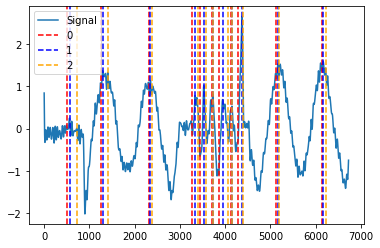

In [ ]:
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]

# Visualize SCR features in cleaned EDA signal
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

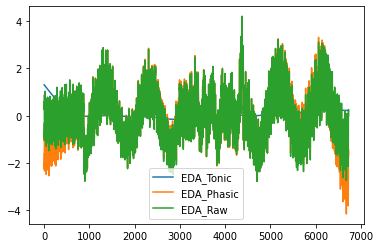

In [ ]:
# Filter phasic and tonic components
data = nk.eda_phasic(tmp, sampling_rate=128)

data["EDA_Raw"] = tmp  # Add raw signal
data.plot()

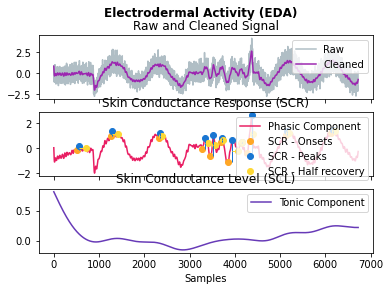

In [ ]:
plot = nk.eda_plot(signals)